In [247]:
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Medium Articles Dataset

We provide a dataset of medium articles which have to be tagged to corresponding topics (software-development, artificial intellignece, Ui/UX). Along with articles we have subscriptions lists. The articles may be related by common subscription lists. The goal is to exploit this naturally occuring network structure for classifying articles to topics. Hence, it is a 3-way node classification task

NOTE : Data folders not on github due to file size limitations

In [248]:
def read_data(dir_name: str, file_name: str):
    """Read the medium articles with lists

    Args:
        dir_name (str): Root directory of the medium title files and lists.

    Returns:
        final_data: merged dataframes with articles and lists
    """

    final_data = pd.read_csv(dir_name+"/"+file_name+".csv")
    return final_data

In [378]:
final_data = pd.read_csv("data/pipeline_assignment_data/full_data_without_labels.csv")
final_data

,article,title,subtitle,author,date,list
0,https://medium.com/@maniakacademy/code-demo-sh...,Code/Demo Share: Palo Alto Firewall Network In...,IP is broken as a unit of Control! IDENTITY as...,Sebastian Maniak,2022-08-17,https://medium.com/@zemmali1990/list/aws-49f68...
1,https://medium.com/towards-artificial-intellig...,Clustering using Social Graph Network,A Social Graph Network can be formed when ther...,Naveed Ahmed Janvekar,2022-01-29,https://medium.com/@TomaszCieplak/list/graph-d...
2,https://medium.com/@sarafparam/transformers-fo...,Transformers for Time-Series,Forecasting still remains to be dominated by S...,Param Saraf,2020-10-20,https://medium.com/@sergiobonato/list/time-ser...
3,https://medium.com/towards-data-science/review...,Reviewing A/B Testing Course by Google on Udacity,Read to find out how A/B tests are performed a...,Suyash Maheshwari,2020-05-10,https://medium.com/@online.rajib/list/ml-c2cac...
4,https://medium.com/towards-data-science/a-comp...,A Comprehensive Hands-on Guide to Transfer Lea...,Deep Learning on Steroids with the Power of Kn...,Dipanjan (DJ) Sarkar,2018-11-14,https://medium.com/@farhanhanavi07/list/deep-l...
...,...,...,...,...,...,...
27713,https://medium.com/cometheartbeat/deep-learnin...,Deep Learning Techniques you Should Know in 2022,"Over the years, Deep Learning has really taken...",Nisha Arya Ahmed,2022-04-21,https://medium.com/@vigguvenki/list/deep-learn...
27714,https://medium.com/towardsdev/intro-to-object-...,Intro to Object-Oriented Programming For Data ...,Implement a simple Linear Regression with OOP ...,Bex T.,2021-04-12,https://medium.com/@or.matalon2/list/oop-4aad5...
27715,https://medium.com/towards-data-science/learn-...,Learn Enough Docker to be Useful,Part 1: The Conceptual Landscape — Containers ...,Jeff Hale,2019-01-09,https://medium.com/@vaibhavb2473/list/machine-...
27716,https://medium.com/berndruecker/moving-from-em...,Moving from embedded to remote workflow engines,"For a long time, we have advocated for an arch...",Bernd Rücker,2022-02-08,https://medium.com/@giamma80/list/java-3c31810...


In [250]:
train = read_data("data/pipeline_assignment_data","train")
train

,index,article,title,subtitle,author,date,list,labels
0,3279,https://medium.com/dev-genius/how-to-convert-m...,How to Convert MP4 Videos to Animated GIFs,With Kazam and ffmpeg on GNU/Linux systems — I...,Jordi Bassaganas,2022-06-02,https://medium.com/@zzpzaf.se/list/var-4f4a92d...,software-development
1,26139,https://medium.com/towards-data-science/a-cust...,"Custom SpaCy Model Deployment with AWS ECR, Sa...",A tutorial on how to deploy SpaCy with AWS. — ...,Cheng,2021-06-04,https://medium.com/@munivinayk/list/nlp-242e66...,artificial-intelligence
2,9946,https://medium.com/towards-data-science/5-book...,5 Books To Grow As A Leader In Data Analytics,Are you a senior analyst growing towards a man...,Valentin Mucke,2022-01-15,https://medium.com/@Nikhil_Phadtare/list/books...,artificial-intelligence
3,2353,https://medium.com/@unsuitable001/package-cron...,"package:cronet, an HTTP Dart/Flutter package w...",My Dart Google Summer of Code 2021 experience....,Soumyadip Monda,2021-08-21,https://medium.com/@djibi.jb/list/flutter-e53c...,software-development
4,8266,https://medium.com/towards-data-science/statis...,Statistics in Python — Collinearity and Multic...,Understand how to discover multicollinearity i...,Wei-Meng Lee,2021-10-01,https://medium.com/@abhiagar/list/stats-765e27...,software-development
...,...,...,...,...,...,...,...,...
22377,6669,https://medium.com/towards-data-science/linkin...,Linking Documents in a Semantic Graph (Part 2),How to design your own graph using TigerGraph ...,Akash Kau,2020-05-27,https://medium.com/@william.sheffel/list/tiger...,artificial-intelligence
22378,18163,https://medium.com/towards-data-science/automa...,Automate Video Editing with Python,Automate the editing of explainer videos to cr...,Samir Saci,2022-11-10,https://medium.com/@jstart.james/list/photogra...,software-development
22379,13001,https://medium.com/towards-data-science/make-p...,Make Python Run As Fast As C,Faster Python Code With Numba — The Speed Issu...,Lukas Frei,2021-08-04,https://medium.com/@jstart.james/list/system-e...,artificial-intelligence
22380,25234,https://medium.com/towards-data-science/6-juli...,6 Julia Frameworks to Create Desktop GUI’s and...,Julia is used for a lot of deeply technical ap...,Logan Kilpatrick,2022-01-05,https://medium.com/@gurumurthi/list/julia-3583...,software-development


In [251]:
test = read_data("data/pipeline_assignment_data","test")
test

,index,article,title,subtitle,author,date,list,labels
0,2291,https://medium.com/towards-data-science/how-to...,How to Use the IBM Watson Tone Analyzer to Per...,How to use the IBM Watson Artificial Intellige...,Graham Harrison,2022-01-02,https://medium.com/@4ndres.gaviria/list/nlp-to...,artificial-intelligence
1,7292,https://medium.com/towards-data-science/surviv...,Survival Analysis: Intuition & Implementation ...,There is a statistical technique which can ans...,Anurag Pandey,2019-01-06,https://medium.com/@jz5246/list/analytics-559c...,artificial-intelligence
2,6768,https://medium.com/experience-stack/embrace-co...,Embrace Complexity (Part 1),Why all organisations should build internal ne...,Tony Seale,2022-02-04,https://medium.com/@yasha.brener/list/data-man...,software-development
3,15003,https://medium.com/towards-data-science/every-...,"Every Complex DataFrame Manipulation, Explaine...","Melts, pivots, joins, explodes, & more — Panda...",Andre Ye,2020-07-22,https://medium.com/@4ndres.gaviria/list/dataop...,artificial-intelligence
4,19782,https://medium.com/towards-data-science/macroe...,Macroeconomic & Financial Factors and Ordinary...,Econometrics model using Arbitrage Pricing The...,Sarit Maitra,2020-06-27,https://medium.com/@halo9pan/list/quantitative...,software-development
...,...,...,...,...,...,...,...,...
3945,14424,https://medium.com/towards-data-science/normal...,Normalization vs Standardization — Quantitativ...,Stop using StandardScaler from Sklearn as a de...,Shay Geller,2019-04-04,https://medium.com/@farhanhanavi07/list/applie...,artificial-intelligence
3946,18949,https://medium.com/@petruknisme/getting-starte...,Getting Started with Covenant C2 for Red Teaming,Command and Control is part of Red Teaming tac...,Aan,2021-11-21,https://medium.com/@jimmy.winghang/list/mitre-...,software-development
3947,9305,https://medium.com/towards-data-science/how-to...,How to Create a Vector-Based Movie Recommendat...,Building a movie recommendation system using t...,Michelangiolo Mazzeschi,2021-12-10,https://medium.com/@subhasis.jethy/list/recomm...,artificial-intelligence
3948,24337,https://medium.com/towards-data-science/how-to...,How to Use Pandas for Big Data,Run distributed workload with Pandas on Spark ...,Edwin Tan,2022-01-25,https://medium.com/@jethro_torczon/list/big-da...,artificial-intelligence


In [252]:
train["labels"].value_counts()

labels
software-development       11586
artificial-intelligence    10646
ux                           150
Name: count, dtype: int64

In [253]:
test["labels"].value_counts()

labels
software-development       2022
artificial-intelligence    1899
ux                           29
Name: count, dtype: int64

In [254]:
train.subtitle

0        With Kazam and ffmpeg on GNU/Linux systems — I...
1        A tutorial on how to deploy SpaCy with AWS. — ...
2        Are you a senior analyst growing towards a man...
3        My Dart Google Summer of Code 2021 experience....
4        Understand how to discover multicollinearity i...
                               ...                        
22377    How to design your own graph using TigerGraph ...
22378    Automate the editing of explainer videos to cr...
22379    Faster Python Code With Numba — The Speed Issu...
22380    Julia is used for a lot of deeply technical ap...
22381    For years now, most of us have heard the word ...
Name: subtitle, Length: 22382, dtype: object

In [461]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
"""Generate necoding for labels using label encoder"""
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(train["labels"])

Y = multilabel_binarizer.transform(train["labels"])
texts = [x[0]+" " + x[1] for x in zip(train.title,train.subtitle)]

In [462]:
label_mapping = dict(zip(multilabel_binarizer.classes_, multilabel_binarizer.transform(multilabel_binarizer.classes_)))
label_mapping

{'artificial-intelligence': 0, 'software-development': 1, 'ux': 2}

In [463]:
from gensim.models import Word2Vec
"""Train word2vec model on title + subtitles to establish a baseline 
    without network structure
"""
all_texts = [x[0]+" " + x[1] for x in zip(final_data.title,final_data.subtitle)]

word2vec_model = Word2Vec([text.split(" ") for text in all_texts], vector_size=128, window=10, epochs=30, sg=1, workers=4,min_count=1)

In [464]:
from sklearn.svm import SVC
embeddings = []
"""Infer word2vec embeddings for article titles and subtitles using trained word2vec model
"""
for text in texts:
    embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddings).shape)
X_word2vec = np.vstack(embeddings)



text_embeddings = embeddings




(22382, 128)


In [465]:
"""Train a SVM classifier on generated article embeddings
"""
svc_w2v = SVC()
svc_w2v.fit(X_word2vec,Y)

SVC()

In [466]:
test_embeddings = []
text_texts = [x[0]+" " + x[1] for x in zip(test.title,test.subtitle)]
"""Compute embeddings for test samples
"""
for text in text_texts:
    test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(test_embeddings).shape)
X_word2vec_test = np.vstack(test_embeddings)

text_test_embeddings = test_embeddings

(3950, 128)


In [467]:
"""Generate predictions using the SVM classifier for test articles
"""
predictions_w2v = svc_w2v.predict(X_word2vec_test)

In [468]:
"""Encode predictions
    """
Y_test = multilabel_binarizer.transform(test["labels"])

Y_test

array([0, 0, 1, ..., 0, 0, 0])

In [469]:
from sklearn import metrics
"""Compute Macro f1"""
print(metrics.f1_score(Y_test, predictions,average="macro"))


0.7481590737395373


In [470]:
print(metrics.classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1899
           1       0.86      0.78      0.82      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.83      3950
   macro avg       0.84      0.70      0.75      3950
weighted avg       0.83      0.83      0.82      3950



# Pipeline Overview

our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list.

This step is followed by a random walk to construct node embeddings.

Then the node embeddings are employed for the task of topic classification.

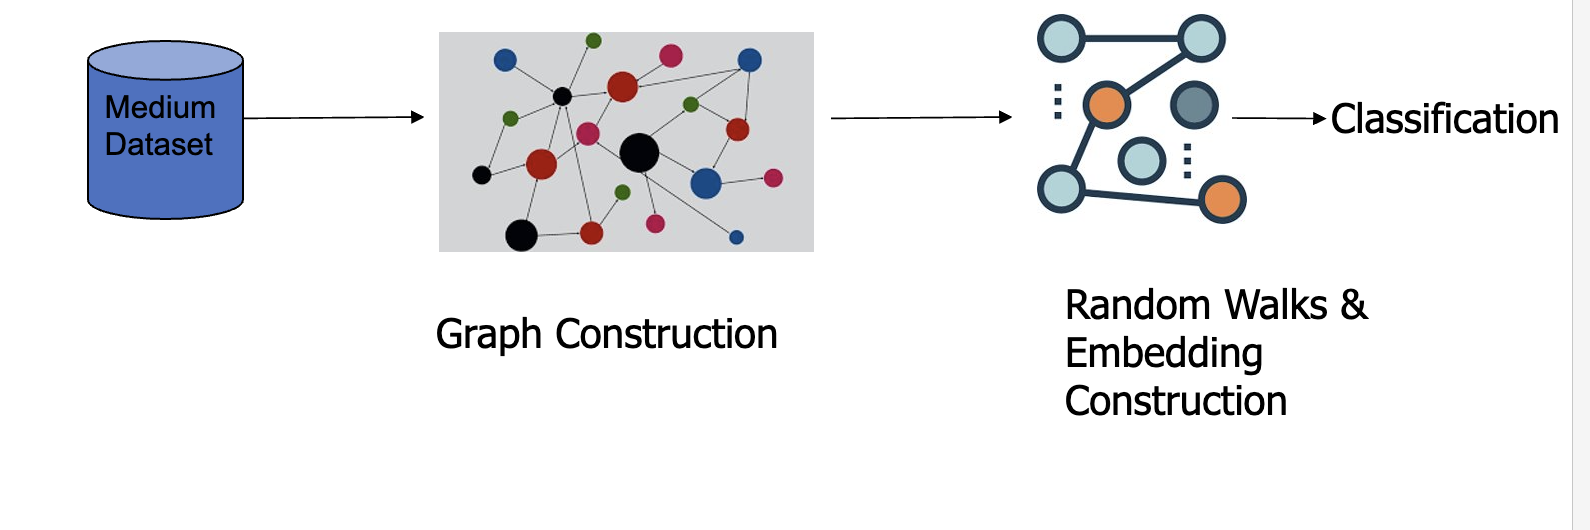

# Form graph

Our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list. The networkx part has already been written for you. 

Your task here is to write the module to construct the edges and find isolated nodes and also analyze the resulting graph by reporting number of edges, number of nodes, number of isolated nodes. 



In [265]:


from typing import List,Dict
from itertools import combinations

def get_edges(data: pd.DataFrame, nodes) -> List:
    """ Given the dataframe with articles and lists return the set of edges
        Args:
        data (pd.DataFrame): The medium dataset
        nodes: dict (nodeid: article title)
    Returns:
            edges (List[tuple]): List of edges"""
    edges = []
    node_keys = list(nodes.keys())

    for (index1, row1), (index2, row2) in combinations(data.iterrows(), 2):
        lists1 = row1['list'].split(";")
        lists2 = row2['list'].split(";")
        # Check if the two nodes share at least one listId
        if set(lists1).intersection(lists2):
            # They share a listId, so we add an edge
            node1 = row1['title']
            node2 = row2['title']
            node_id1 = node_keys[index1]
            node_id2 = node_keys[index2]

            if node_id1 is not None and node_id2 is not None:
                edges.append((node_id1, node_id2))

    return edges


    ##END
    return edges

In [266]:
def get_nodes(data: pd.DataFrame) -> Dict:
    """ Given the dataframe with articles and lists return the set of nodes
        Args:
        data (pd.DataFrame): The medium dataset
    Returns:
        nodes: dict (nodeid: article title)"""
    nodes = {}
    for index, row in data.iterrows():
        if index not in nodes:
            nodes[index] = row["title"]
    print(len(nodes))
    return nodes

In [267]:
import networkx as nx
def form_graph(data: pd.DataFrame) -> nx.Graph:
    """Forms graph from medium article dataset.

    Args:
        data (pd.DataFrame): The medium dataset

    Returns:
        G (nx.Graph): The graph.

       """
    texts = [x[0]+" " + x[1] for x in zip(data.title,data.subtitle)]
    nodes = get_nodes(data)
    edges = get_edges(data, nodes)
    graph = nx.Graph()
    graph.add_nodes_from(list(nodes.keys()))
    graph.add_edges_from(edges)
    return graph


In [268]:
graph = form_graph(final_data)


27718


In [269]:
print(graph)

Graph with 27718 nodes and 1332110 edges


The graph is of considerable size and exhibits a strong level of connectivity. It consists of 27,718 nodes and 1,332,110 edges, resulting in an average of approximately 48 edges per node.

# Node2Vec

Here the task is to perform random walks on the graph formed in the previous step and compute embeddings for the nodes using the random walk results.

You can use gensim to compute embeddings, however for random walks you are expected to implement without relying on networkx. Your weblab assignment would aid you in the same. For gensim you are expected to use Word2Vec. However you  can explore on best ways to configure the hyperparams for your word2vec instance for better donwstream classification task.

In [270]:
# Find isolated nodes with no neighbors before random walks
### START
isolated = [n for n in nx.isolates(graph)]
### END

In [506]:
print(len(isolated))

700


During our analysis, we have identified the presence of 700 isolated nodes within the graph. When computing the node embeddings they will be represented with a zero vector as they have no structure to approximate with random walks.

In [271]:
def random_walks(G: nx.Graph, num_walks: int, walk_length: int, isolated: List) -> np.ndarray:
    """Perform random walks on the graph.

    Args:
        G (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.
        isolated (List[int]): list of isolated nodeids

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    result = []
    ### START
    num_nodes = G.number_of_nodes() - len(isolated);
    result = []

    for start_node in G.nodes():
      if start_node in isolated: continue;
      for _ in range(num_walks):
        current_node = start_node
        walk = [start_node]
        for _ in range(walk_length - 1):
          neighbors = [n for n in G.adj[current_node]]
          current_node = np.random.choice(neighbors);
          walk.append(current_node);
        result.append(walk)

    result = np.asarray(result).reshape((num_nodes*num_walks, walk_length));
    
    ## END
    return np.asarray(result)

In [512]:
walks = random_walks(graph, 8, 15,isolated)
walks2 = random_walks(graph, 12, 20, isolated)

In [273]:
walks_as_strings = [[str(node) for node in walk] for walk in walks]

In [274]:
from gensim.models import Word2Vec
def fit_node2vec(walks: np.ndarray, vector_size: int, window: int, epochs: int) -> Word2Vec:
    """Train a Node2Vec model on random walks. Uses the GenSim Word2Vec implementation.

    Args:
        walks (np.ndarray): The random walks.
        vector_size (int): Node representation size.
        window (int): Window width.
        epochs (int): Number of epochs.

    Returns:
        Word2Vec: The trained model.
    """
   ### START

    # Convert walks to strings
    walks_as_strings = [[str(node) for node in walk] for walk in walks]
    # Train model
    model = Word2Vec(sentences = walks_as_strings, vector_size=vector_size, window=window, epochs=epochs)
    return model

   ### END

In [513]:
model = fit_node2vec(walks, 128, 5, 10)
model2 = fit_node2vec(walks2, 128, 5, 10)

In [276]:
#embeddings = {doc: model.dv[doc] for doc in model.dv.index_to_key}


In [277]:
def get_nodeids(data: pd.DataFrame):
    """Get nodeids from graph

    Args:
        data (pd.DataFrame): medium articles dataset

    Returns:
        nodes (dict): nodeids with mapped article titles
    """
    nodes = {}
    for index, row in data.iterrows():
        if row["index"] not in nodes:
            nodes[row["index"]] = row["title"]
    return nodes

In [393]:
"""Get train and test nodes from the graph
    """


train_nodes = get_nodeids(train)
test_nodes = get_nodeids(test)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())


[3279, 26139, 9946, 2353, 8266, 26638, 903, 2162, 13638, 22432, 17021, 1102, 409, 5819, 22453, 11245, 21848, 11850, 18169, 26070, 19347, 21870, 8796, 3482, 5740, 24718, 15580, 25347, 2527, 424, 15373, 14210, 3141, 20120, 10492, 23579, 18708, 27355, 25159, 25939, 27627, 22567, 20479, 13942, 22046, 2993, 2689, 21608, 7817, 11494, 298, 17215, 27098, 18760, 16260, 27211, 25437, 24037, 33, 20782, 3573, 23481, 23609, 5546, 646, 6576, 17733, 14177, 3020, 24981, 3314, 9285, 9612, 10717, 1392, 5935, 9654, 3705, 16133, 10907, 17706, 23345, 83, 24000, 1767, 21053, 21599, 26268, 12513, 2256, 7891, 20223, 10984, 15519, 16784, 16952, 25542, 19799, 16649, 15242, 26358, 18734, 14932, 11439, 26922, 27456, 13238, 6453, 1950, 669, 18448, 8518, 24683, 21314, 9467, 21213, 23293, 22315, 15451, 3687, 25137, 1943, 16276, 18295, 9840, 3347, 2562, 5678, 25671, 3755, 22463, 18071, 12768, 4026, 22612, 26988, 22839, 4770, 10397, 4385, 22478, 14733, 3408, 11090, 23176, 19085, 24179, 1455, 513, 14476, 2411, 7354, 27

In [279]:
len(test_nodes)

3950

In [516]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings = {word: model.wv[word] for word in model.wv.index_to_key}
embeddings2 = {word: model2.wv[word] for word in model2.wv.index_to_key}


In [281]:
def getEmbeddings(model, isolated):
  embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

  standard_embedding = np.zeros(model.vector_size)
  for node in isolated:
    embeddings[str(node)] = standard_embedding

In [282]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings_our = getEmbeddings(model, isolated)

# Word2vec + Node2vec

In [517]:
"""Compute train and test embeddings.
Concatenate the word2vec embeddings of article titles
with the node2vec embeddings suing dictionary from previous step.
Dimension 1 of your embeddings should be 256.
 Consider isolated nodes and handle them when computing embeddings

"""

node_train_embeddings =  np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)
node_test_embeddings = np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)

node_train_embeddings2 =  np.array([embeddings2[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)
node_test_embeddings2 = np.array([embeddings2[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)


In [ ]:
print(np.vstack(node_test_embeddings).shape)
print(np.vstack(text_test_embeddings).shape)

print(np.vstack(node_train_embeddings).shape)
print(np.vstack(text_embeddings).shape)

X_train = np.concatenate((node_train_embeddings, text_embeddings), axis=1)
X_test = np.concatenate((node_test_embeddings, text_test_embeddings), axis=1)

X_train2 = np.concatenate((node_train_embeddings2, text_embeddings), axis=1)
X_test2 = np.concatenate((node_test_embeddings2, text_test_embeddings), axis=1)




(3950, 128)
(3950, 128)
(22382, 128)
(22382, 128)


In [446]:
X_test.shape,X_train.shape

((3950, 256), (22382, 256))

In [448]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svc = SVC()
svc.fit(X_train,Y)

SVC()

In [449]:
Y.shape

(22382,)

In [450]:
X_test.shape

(3950, 256)

In [451]:
predictions = svc.predict(X_test)

In [452]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [453]:
from sklearn import metrics
print(metrics.f1_score(Y_test, predictions,average="macro"))


0.7481590737395373


In [454]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1899
           1       0.86      0.78      0.82      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.83      3950
   macro avg       0.84      0.70      0.75      3950
weighted avg       0.83      0.83      0.82      3950



# Only node2vec features

In [456]:
embeddings = {word: model.wv[word] for word in model.wv.index_to_key}


X_train_n2v =  np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)

X_test_n2v =np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)


In [457]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svc_n2v = SVC()
svc_n2v.fit(X_train_n2v,Y)

SVC()

In [458]:
predictions_n2v = svc_n2v.predict(X_test_n2v)

In [459]:
from sklearn import metrics
print(metrics.f1_score(Y_test, predictions_n2v,average="macro"))


0.7258831077031411


In [376]:
print(metrics.classification_report(Y_test, predictions))



              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1899
           1       0.85      0.73      0.78      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.79      3950
   macro avg       0.82      0.68      0.73      3950
weighted avg       0.80      0.79      0.79      3950



 Compare performance of word2vec only, node2vec embeddings only (above) and word2vec+node2vec settings.
  Report your intuition below in text as to why one works better than other and to what extent network structure helps compare dto only using word2vec embeddings of titles and subtitles (first result).

 You can also plot the tsne plot of embeddings to gain more intuition

In [473]:
print(metrics.f1_score(Y_test, predictions,average="macro"))
print(metrics.f1_score(Y_test, predictions_n2v,average="macro"))
print(metrics.f1_score(Y_test, predictions_w2v,average="macro"))




0.7481590737395373
0.7258831077031411
0.5519091449843699


These F1 scores represent the performance of Node2Vec + Word2Vec, Node2Vec, and Word2Vec models. It is evident that the Node2Vec model exhibits significant improvement over Word2Vec, contributing significantly to the overall F1 score.

In [474]:
print(metrics.classification_report(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions_n2v))
print(metrics.classification_report(Y_test, predictions_w2v))



              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1899
           1       0.86      0.78      0.82      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.83      3950
   macro avg       0.84      0.70      0.75      3950
weighted avg       0.83      0.83      0.82      3950

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1899
           1       0.85      0.73      0.78      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.79      3950
   macro avg       0.82      0.68      0.73      3950
weighted avg       0.80      0.79      0.79      3950

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1899
           1       0.84      0.81      0.83      2022
           2       0.00      0.00      0.00        29

    accuracy        

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These detailed scores provide insights into the performance of Node2Vec + Word2Vec, Node2Vec, and Word2Vec models. Notably, it is observed that the Word2Vec model does not make any predictions for class "2," which likely contributes to its comparatively lower performance.

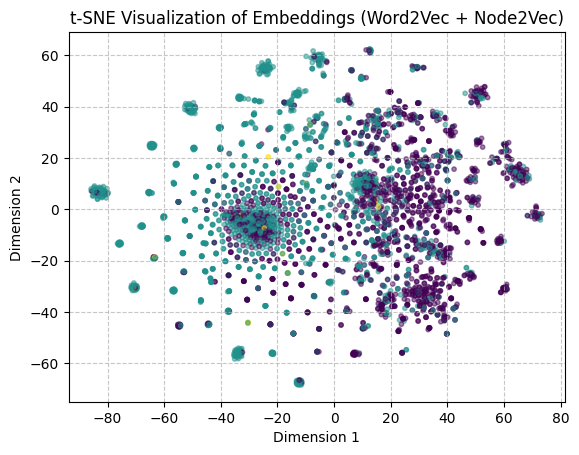

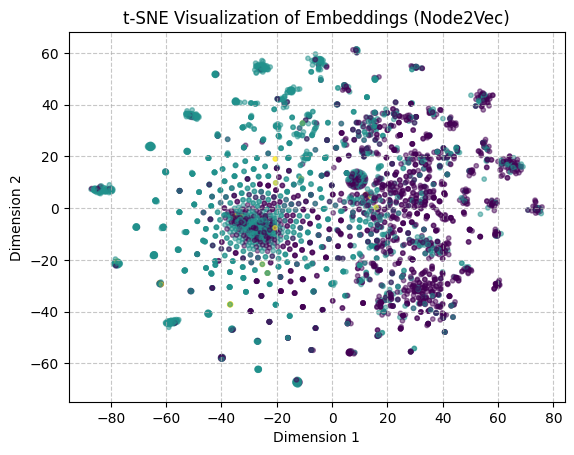

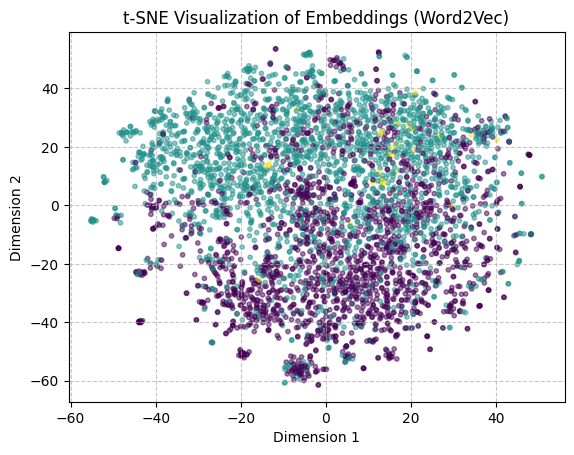

In [487]:
#TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply TSNE to reduce dimensionality
tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(X_test)

point_size = 10

# Define the color map
color_map = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# Visualize the embeddings with color map
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=Y_test, alpha=0.5, s=point_size)



# Improve the readability of the plot
plt.title('t-SNE Visualization of Embeddings (Word2Vec + Node2Vec)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



# Apply TSNE to reduce dimensionality
tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(X_test_n2v)


# Visualize the embeddings with color map
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=Y_test, alpha=0.5, s=point_size)


# Improve the readability of the plot
plt.title('t-SNE Visualization of Embeddings (Node2Vec)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Apply TSNE to reduce dimensionality
tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(X_word2vec_test)

# Visualize the embeddings with color map
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=Y_test, alpha=0.5, s=point_size)

# Improve the readability of the plot
plt.title('t-SNE Visualization of Embeddings (Word2Vec)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

As anticipated based on the F1 scores, the Node2Vec and Node2Vec + Word2Vec embeddings exhibit remarkable similarity. However, it is evident that the Word2Vec embeddings are less distinct, resulting in the complete loss of all class "2" (yellow) points within the blue class.

### For Kaggle

In [496]:

# Combine the train set and test set
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((Y, Y_test), axis=0)

print(X_combined.shape)


# Retrain the model using the combined dataset
final_svc = SVC()
final_svc.fit(X_combined, y_combined)


(26332, 256)


SVC()

In [515]:
label_mapping = {
    0: 'artificial-intelligence',
    1: 'software-development',
    2: 'ux' 
}

test_kaggle = read_data("data/pipeline_assignment_data", "testKaggle")

embeddings2 = {word: model2.wv[word] for word in model2.wv.index_to_key}


kaggle_nodes = get_nodeids(test_kaggle)
kaggle_nodes = list(kaggle_nodes.keys())

node_embeddings = np.array([embeddings2[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(kaggle_nodes)  ], dtype=np.float32)

text_embeddings = []

text_texts = [x[0]+" " + x[1] for x in zip(test_kaggle.title,test_kaggle.subtitle)]

test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))

for text in text_texts:
    text_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))



X_KAGGLE = np.concatenate((node_embeddings, text_embeddings), axis=1)


# And these are your model's numeric predictions
numeric_predictions = final_svc.predict(X_KAGGLE)  # Replace with your actual predictions

# Convert numeric predictions to string labels
string_predictions = [label_mapping[pred] for pred in numeric_predictions]

# Create a DataFrame with the index and the string predictions
submission_df = pd.DataFrame({
    'Index': range(len(string_predictions)),
    'Label': string_predictions
})

# Export the DataFrame to a CSV file
submission_df.to_csv('submission7.csv', index=False)